In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Folder with the data information, this change depending where you have the information
validation_dir = '/content/drive/My Drive/ML_enfasis_V2/data/entrenamiento'
train_dir = '/content/drive/My Drive/ML_enfasis_V2/data/validacion'


#inside of those packets we have the 2 data sets, cats and dogs, so we need to tag them 
train_fish_dir = os.path.join(train_dir, 'Fish')  # directory with our training fish pictures
train_flower_dir = os.path.join(train_dir, 'Flower')  # directory with our training Flower pictures
train_gravel_dir = os.path.join(train_dir, 'Gravel')  # directory with our training gravel pictures 
train_sugar_dir = os.path.join(train_dir, 'Sugar')  # directory with our training Sugar pictures 

validation_fish_dir = os.path.join(validation_dir, 'Fish')  # directory with our validation fish pictures
validation_flower_dir = os.path.join(validation_dir, 'Flower')  # directory with our validation flower pictures
validation_gravel_dir = os.path.join(validation_dir, 'Gravel')  # directory with our validation gravel pictures
validation_sugar_dir = os.path.join(validation_dir, 'Sugar')  # directory with our validation sugar pictures

num_fish_tr = len(os.listdir(train_fish_dir)) #this is the length of the images of fish to train
num_flower_tr = len(os.listdir(train_flower_dir)) #this is the length of the images of flower to train
num_gravel_tr = len(os.listdir(train_gravel_dir)) #this is the length of the images of gravel to train
num_sugar_tr = len(os.listdir(train_sugar_dir)) #this is the length of the images of sugar to train

num_fish_val = len(os.listdir(validation_fish_dir)) #this is the length of the images of fish for validation
num_flower_val = len(os.listdir(validation_flower_dir)) #this is the length of the images of flower for validation
num_gravel_val = len(os.listdir(validation_gravel_dir)) #this is the length of the images of gravel for validation
num_sugar_val = len(os.listdir(validation_sugar_dir)) #this is the length of the images of sugar for validation

total_train = num_fish_tr + num_flower_tr + validation_gravel_dir + num_sugar_tr #this is the length of the images of cats to train
total_val = num_fish_val + num_flower_val + num_gravel_val + num_sugar_val #this is the length of the images of dogs to train
print("Total training images:", total_train) #print the total numer of cat pictures 
print("Total validation images:", total_val) #print the total numer of dog pictures

"""
Parameters
"""
batch_size = 128 # number of samples that will be propagated through the network
epochs = 15 # numer of forward an backward pass for each batch_size
IMG_HEIGHT = 150 #height of the pictures
IMG_WIDTH = 150 #width of the pictures


Total training images: 2045
Total validation images: 999


In [0]:
##Preparamos nuestras imagenes

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

#in validation we don't do nothing because are an example of how real image should be
image_gen_val = ImageDataGenerator(rescale=1./255)

Found 2043 images belonging to 3 classes.
Found 999 images belonging to 3 classes.


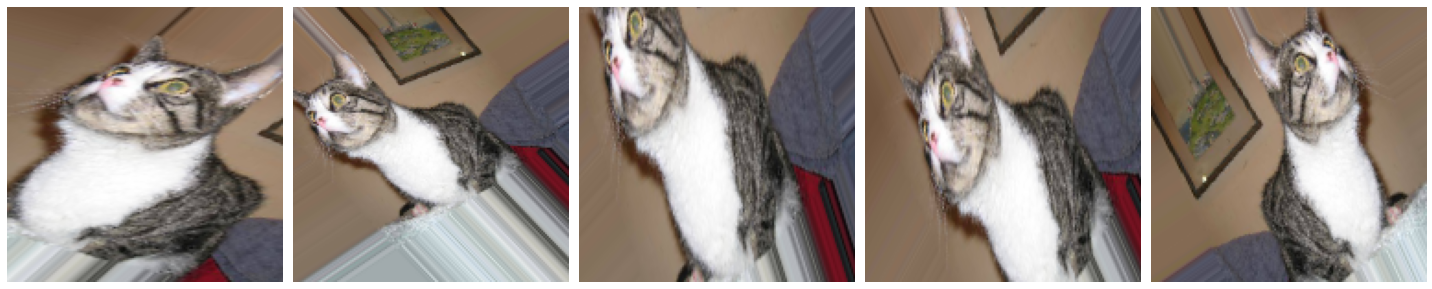

In [0]:
#define what the cnn will use to train 
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
model_enfa = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', #convolution with 16 filterns of 3 of size
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),                                     #drop out of 20% to turn off 20% on neurons
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),                                   #drop out of 20% to turn off 20% on neurons
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3)
])

In [0]:
model_enfa.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(
    name='categorical_crossentropy'),
                  metrics=['accuracy'])
model_enfa.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)       

In [0]:
history = model_enfa.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 991s 66s/step - loss: 5.4529 - accuracy: 0.0397 - val_loss: 15.7943 - val_accuracy: 0.0201
Epoch 2/15
15/15 [==============================] - 33s 2s/step - loss: 15.9573 - accuracy: 0.0099 - val_loss: 15.7943 - val_accuracy: 0.0201
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 15.9489 - accuracy: 0.0104 - val_loss: 15.7943 - val_accuracy: 0.0201
Epoch 4/15
15/15 [==============================] - 18s 1s/step - loss: 15.9657 - accuracy: 0.0094 - val_loss: 15.7943 - val_accuracy: 0.0201
Epoch 5/15
15/15 [==============================] - 18s 1s/step - loss: 15.9573 - accuracy: 0.0099 - val_loss: 15.7943 - val_accuracy: 0.0201
Epoch 6/15
15/15 [==============================] - 18s 1s/step - loss: 15.9741 - accuracy: 0.0089 - val_loss: 15.7943 - v

In [0]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model_enfa.save('./modelo/modelo.h5')
model_enfa.save_weights('./modelo/pesos.h5')

In [0]:
"""import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

longitud, altura = 150, 150
modelo = './modelo/modelo.h5'
pesos_modelo = './modelo/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)"""


"import numpy as np\nfrom keras.preprocessing.image import load_img, img_to_array\nfrom keras.models import load_model\n\nlongitud, altura = 150, 150\nmodelo = './modelo/modelo.h5'\npesos_modelo = './modelo/pesos.h5'\ncnn = load_model(modelo)\ncnn.load_weights(pesos_modelo)"

In [0]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

def predict(file):
  x = load_img(file, target_size=(150, 150))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model_enfa.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("pred: Fish")
  elif answer == 1:
    print("pred: Flower")
  elif answer == 2:
    print("pred: Gravel")
  elif answer == 3:
    print("pred: Sugar")
  return answer
predict('cloud.jpg')

el tipo de nube en la foto es:


NameError: ignored